In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/wangy51/Documents/Rose-Hulman/2022 Winter/MA384/project/archive/players.csv")
df.head(3)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
0,1,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,5,Medium/ Low,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee..."
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,5,High/ Low,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ..."
2,3,Jan Oblak,GK,1993-01-07,188,87,91,93,GK,91,...,3,Medium/ Medium,Unique,12,13,14,40,30,NaN,"['GK Long Throw', 'Comes For Crosses']"


In [4]:
df.dtypes

int_player_id                      int64
str_player_name                   object
str_positions                     object
dt_date_of_birth                  object
int_height                         int64
int_weight                         int64
int_overall_rating                 int64
int_potential_rating               int64
str_best_position                 object
int_best_overall_rating            int64
int_value                          int64
int_wage                           int64
int_team_id                      float64
str_nationality                   object
int_crossing                       int64
int_finishing                      int64
int_heading_accuracy               int64
int_short_passing                  int64
int_volleys                        int64
int_defensive_awareness            int64
int_standing_tackle                int64
int_sliding_tackle                 int64
int_diving                         int64
int_handling                       int64
int_kicking     

In [10]:
df['salary_rank'] = pd.qcut(df['int_wage'],q=4,labels=['L','ML','MH','H'])
df.head(3)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait,salary_rank
0,1,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,Medium/ Low,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee...",H
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,High/ Low,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ...",H
2,3,Jan Oblak,GK,1993-01-07,188,87,91,93,GK,91,...,Medium/ Medium,Unique,12,13,14,40,30,NaN,"['GK Long Throw', 'Comes For Crosses']",H


In [11]:
df['salary_rank'].value_counts()

L     5831
ML    4744
H     4718
MH    3709
Name: salary_rank, dtype: int64

In [19]:
df['salary_rank'] = df['salary_rank'].astype('category')
df['str_positions'] = df['str_positions'].astype('category')
df['str_best_position'] = df['str_best_position'].astype('category')
df['str_nationality'] = df['str_nationality'].astype('category')
df['str_preferred_foot'] = df['str_preferred_foot'].astype('category')
df['str_trait'] = df['str_trait'].astype('category')
df['str_player_speciality'] = df['str_player_speciality'].astype('category')
df['str_body_type'] = df['str_body_type'].astype('category')
df['str_work_rate'] = df['str_work_rate'].astype('category')

In [55]:
df.dropna()

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait,salary_rank
0,1,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,Medium/ Low,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee...",H
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,High/ Low,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ...",H
3,4,Kevin De Bruyne,"CAM, CM",1991-06-28,181,70,91,91,CAM,91,...,High/ High,Unique,88,85,83,93,92,"['Dribbler', 'Playmaker\xa0', 'Engine', 'Dista...","['Injury Prone', 'Leadership', 'Early Crosser'...",H
4,5,Neymar da Silva Santos Júnior,"LW, CAM",1992-02-05,175,68,91,91,LW,91,...,High/ Medium,Unique,95,88,89,81,95,"['Speedster', 'Dribbler', 'Playmaker\xa0', 'FK...","['Injury Prone', 'Flair', 'Speed Dribbler (AI)...",H
5,6,Robert Lewandowski,ST,1988-08-21,184,80,91,91,ST,91,...,High/ Medium,Unique,85,79,85,70,88,"['Distance Shooter', 'Clinical Finisher']","['Solid Player', 'Finesse Shot', 'Outside Foot...",H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15423,15424,David Loera,"CAM, CF",1998-09-10,165,59,60,71,CAM,62,...,High/ Medium,Lean (170-),65,52,48,54,60,['Acrobat'],"['Speed Dribbler (AI)', 'Technical Dribbler (A...",L
15658,15659,Ricky-Jade Jones,"ST, CAM, LW",2002-11-08,182,70,59,82,ST,61,...,High/ Medium,Lean (170-185),55,52,43,46,54,['Speedster'],['Speed Dribbler (AI)'],L
16059,16060,Enes Olgun Tubluk,"RM, LM",2000-06-03,171,68,59,71,CAM,60,...,High/ Low,Lean (170-185),65,59,38,43,59,['Acrobat'],['Flair'],L
16283,16284,Terrell Egbri,"RM, RW",2001-06-21,163,60,58,75,RM,59,...,Medium/ Medium,Lean (170-),61,46,30,44,58,['Acrobat'],['Speed Dribbler (AI)'],L


In [56]:
df.dtypes

int_player_id                       int64
str_player_name                    object
str_positions                    category
dt_date_of_birth                   object
int_height                          int64
int_weight                          int64
int_overall_rating                  int64
int_potential_rating                int64
str_best_position                category
int_best_overall_rating             int64
int_value                           int64
int_wage                            int64
int_team_id                       float64
str_nationality                  category
int_crossing                        int64
int_finishing                       int64
int_heading_accuracy                int64
int_short_passing                   int64
int_volleys                         int64
int_defensive_awareness             int64
int_standing_tackle                 int64
int_sliding_tackle                  int64
int_diving                          int64
int_handling                      

In [64]:
X = df.drop(['salary_rank','int_player_id','str_player_name','int_team_id','int_wage','dt_date_of_birth'],axis=1)
y = df.salary_rank

In [65]:
X.head()

,str_positions,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,int_value,str_nationality,int_crossing,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
0,"RW, ST, CF",170,72,93,93,RW,93,103500000,Argentina,85,...,5,Medium/ Low,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee..."
1,"ST, LW",187,83,92,92,ST,92,63000000,Portugal,84,...,5,High/ Low,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ..."
2,GK,188,87,91,93,GK,91,120000000,Slovenia,13,...,3,Medium/ Medium,Unique,12,13,14,40,30,NaN,"['GK Long Throw', 'Comes For Crosses']"
3,"CAM, CM",181,70,91,91,CAM,91,129000000,Belgium,94,...,4,High/ High,Unique,88,85,83,93,92,"['Dribbler', 'Playmaker\xa0', 'Engine', 'Dista...","['Injury Prone', 'Leadership', 'Early Crosser'..."
4,"LW, CAM",175,68,91,91,LW,91,132000000,Brazil,85,...,5,High/ Medium,Unique,95,88,89,81,95,"['Speedster', 'Dribbler', 'Playmaker\xa0', 'FK...","['Injury Prone', 'Flair', 'Speed Dribbler (AI)..."


In [66]:
X_ohe = pd.get_dummies(X)

In [67]:
dtree = DecisionTreeClassifier()

In [68]:
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

In [69]:
dtreeCV = GridSearchCV(dtree,param_grid=parameters,return_train_score=True,n_jobs=-1)

In [70]:
dtreeCV.fit(X_ohe,y)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [71]:
dtreeCV.best_params_

{'max_depth': 1}

In [72]:
dtreeCV.best_score_

0.41668872457386563

In [73]:
results = pd.DataFrame()
results['depth'] = parameters['max_depth']
results['train'] = dtreeCV.cv_results_['mean_train_score'] # we need to set return_train_score=True to have this data
results['valid'] = dtreeCV.cv_results_['mean_test_score']
results

,depth,train,valid
0,1,0.504552,0.416689
1,2,0.608424,0.392064
2,3,0.642130,0.343340
3,4,0.664102,0.255497
4,5,0.679389,0.206981
5,6,0.696190,0.144140
6,7,0.706373,0.147086
7,8,0.719385,0.165348
8,9,0.731923,0.179926
9,10,0.746264,0.184188


<AxesSubplot:xlabel='depth'>

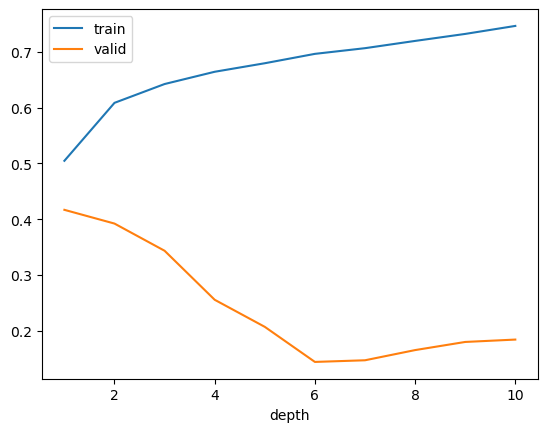

In [74]:
results.plot.line(x='depth', y = ['train','valid'])

In [75]:
dtree = DecisionTreeClassifier(max_depth=1)

In [77]:
dtree.fit(X_ohe,y)

DecisionTreeClassifier(max_depth=1)

In [78]:
dtree_string = export_text(dtree,
                           feature_names=list(X_ohe.columns),
                           decimals=1,
                           spacing=5)
print(dtree_string)

|----- int_best_overall_rating <= 69.5
|     |----- class: L
|----- int_best_overall_rating >  69.5
|     |----- class: H

